In [2]:
import numpy as np

# import qiskit libs
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *

API_KEY = 'c6f6569ab6b6f9ec1a437d4d1187b7c7ea2ac4bd91679613e204e7bb9728efd9639af14a86f840cbb05e60b6a249e532e3168c7dbff07edc4c37de9c4bb3e0b3'
try:
    provider = IBMQ.enable_account(API_KEY)
except Exception as e:
    print(e)

# qiskit plot tool
from qiskit.visualization import plot_histogram

In [3]:
def dj_oracle(case, n, draw=False):
    oracle_qc = QuantumCircuit(n+1)

    if case == "balanced":
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    if draw:
        print(oracle_qc.draw())
        
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [4]:
dj_oracle("balanced", 4, True)


q_0: ──■─────────────────
       │                 
q_1: ──┼────■────────────
       │    │            
q_2: ──┼────┼────■───────
       │    │    │       
q_3: ──┼────┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘


In [5]:
dj_oracle("constant", 4, True)


q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     


In [7]:
dj_oracle("constant", 4, True)


q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘


In [8]:
def dj_algorithm(n, case="random"):
    dj_circuit = QuantumCircuit(n+1, n)

    for qubit in range(n):
        dj_circuit.h(qubit)

    dj_circuit.x(n)
    dj_circuit.h(n)

    if case=="random":
        random_case = np.random.randint(2)
        if random_case == 0:
            case = "constant"
        else:
            case="balanced"
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))

    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    
    return dj_circuit


In [9]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c_0: ═══════════════════════════╩══╬══╬══╬═
                                   ║  ║  ║ 
c_1: ══════════════════════════════╩══╬══╬═
                                      ║  ║ 
c_2: ═════════════════════════════════╩══╬═
                                         ║ 
c_3: ════════════════════════════════════╩═

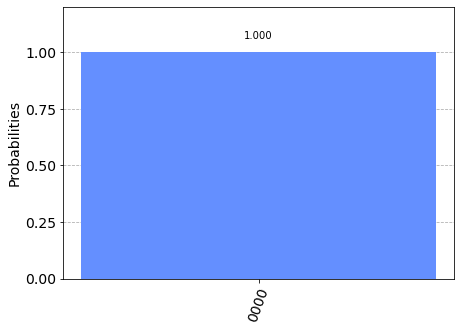

In [10]:
# using local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, 'constant')
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)